#### Imports

In [1]:
#!pip install snscrape
import snscrape.modules.twitter as sntwitter
import pandas as pd
from pandas import *
import datetime
from datetime import date

#### Hide the warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Automation 

In [3]:
yesterday = datetime.datetime.today() - datetime.timedelta(days=1) # save today - 1 
yesterday = str(yesterday)
yesterday = yesterday[:10]
print(yesterday)

today = date.today()
print(today)

2022-11-24
2022-11-25


#### Extract Tweets using query

In [4]:
query = f"(from:visegrad24 OR from:ukraine_world OR from:UATV_en OR from:MFA_Ukraine OR from:DefenceU OR from:KpsZSU OR from:NATO OR from:dpa_intl) lang:en until:{today} since:{yesterday}"
tweets = []
limit = 100


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.username, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Users', 'Tweets'])
print(df)

            Users                                             Tweets
0      visegrad24           @guyverhofstadt Incredible bravery! 💪🏻🇪🇺
1        DefenceU  Kyiv after the most recent russian terrorist a...
2      visegrad24  Partially mobilized soldiers have clashed with...
3      visegrad24  Hungary ratify Sweden and Finland’s NATO membe...
4        DefenceU          Ukrainian Madonna https://t.co/QiZmBa7rN9
..            ...                                                ...
95    MFA_Ukraine  🇺🇦 @ZelenskyyUa: “We can be left without light...
96        UATV_en  ⚡️Ukrainian nuclear power plants will resume w...
97     visegrad24  @alanisalegend @mblaszczak “Already send a bet...
98  ukraine_world  "Putin likes to plunge the people of Ukraine i...
99     visegrad24  @RGTyler Obama announced his decision to aband...

[100 rows x 2 columns]


#### Save the extracted Tweets into a CSV file

In [5]:
# to save to csv
df.to_csv('C:/Users/ashis/OneDrive/Desktop/Sem_2/OSINT/stored_tweets/war_tweets.csv', index = False)

#### Read the saved Tweets

In [6]:
data = read_csv("C:/Users/ashis/OneDrive/Desktop/Sem_2/OSINT/stored_tweets/war_tweets.csv")
extracted_tweets = data['Tweets'].tolist()
#print(extracted_tweets[0])

#### Clean the Tweets

In [7]:
tweet_words = []

for tweet in extracted_tweets:
#     print(tweet)
#     print("-------------")
    for word in tweet.split(' '):
        if word.startswith('@') and len(word) > 1:
            word = ''
        elif word.startswith('http'):
            word = ''
        elif word.startswith('#'):
            word = ''
        tweet_words.append(word)
        
print(tweet_words[:18])
    

['', 'Incredible', 'bravery!', '💪🏻🇪🇺', 'Kyiv', 'after', 'the', 'most', 'recent', 'russian', 'terrorist', 'attacks.\nA', 'family', 'came', 'to', 'a', 'gas', 'station']


#### Create a paragraph

In [8]:
final_text_junk = " ".join(tweet_words)
print(final_text_junk)

#### chunk the text to ustilize the most of the pipeline

In [9]:
max_chunk = 400 

In [10]:
final_text_junk = final_text_junk.replace('.', '.<eos>')
final_text_junk = final_text_junk.replace('?', '?<eos>')
final_text_junk = final_text_junk.replace('!', '!<eos>')
sentences = final_text_junk.split('<eos>')

In [11]:
current_chunk = 0 
chunks = []
for sentence in sentences:
    if len(chunks) == current_chunk + 1: 
        if len(chunks[current_chunk]) + len(sentence.split(' ')) <= max_chunk:
            chunks[current_chunk].extend(sentence.split(' '))
        else:
            current_chunk += 1
            chunks.append(sentence.split(' '))
    else:
        print(current_chunk)
        chunks.append(sentence.split(' '))

for chunk_id in range(len(chunks)):
    chunks[chunk_id] = ' '.join(chunks[chunk_id])

0


In [12]:
chunks[0]

" Incredible bravery!  💪🏻🇪🇺 Kyiv after the most recent russian terrorist attacks. \nA family came to a gas station to charge an inhaler needed by their child. \n#russiaisaterroriststate  Partially mobilized soldiers have clashed with the local population at nightclub in Yurga, near Novosibirsk. \n\nOne of the mobilized soldiers has been hospitalized. \n\nThe Russian Army has sever problems with morale. \n\n  Hungary ratify Sweden and Finland’s NATO membership applications in early Junuary 2023. \n\nThat was the message delivered by PM Orban at today’s Visegrad Group Summit in Slovakia. \n\n🇭🇺🇨🇿🇸🇰🇵🇱  Ukrainian Madonna  40 Canadian soldiers joined their fellow instructor colleagues from Poland and started training Ukrainian soldiers on Polish territory today. \n\n🇵🇱🇺🇦🇨🇦  All 32 teams have now played at the World Cup and Brazil's Richarlison arguably left the best goal until last.   Happy Thanksgiving Day! \n\nDear friends, thank you for standing with  thank you for your unwavering suppor

#### Summerization

In [13]:
#!pip install transformers
#!pip install tensorflow
from transformers import pipeline

In [14]:
summarizer =  pipeline("summarization")

No model was supplied, defaulted to t5-small and revision d769bba (https://huggingface.co/t5-small).
Using a pipeline without specifying a model name and revision in production is not recommended.
All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-small.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [15]:
summary = summarizer(chunks, max_length = 80, min_length= 10, do_sample =  False)

Token indices sequence length is longer than the specified maximum sequence length for this model (540 > 512). Running this sequence through the model will result in indexing errors


In [16]:
text = str(' '.join([text['summary_text'] for text in summary]))

In [17]:
text.capitalize() # doesn't work

'A family came to a gas station to charge an inhaler needed by their child . one of the mobilized soldiers has been hospitalized . the russian army has sever morale problems . the president of the european commission, ursula von der leyen, announced today that works have started on the eu’s 9th sanctions package against russia . she announced it during a meeting in  with finnish pm sanna marin, estonian pm kaja kallas &amp; sweden’s deputy pm ebba busch  0-0 at the world cup, this time between south korea and uruguay . a new law on so called  propaganda has risen . the risks facing the real economy have risen, german central bank says . in nine months of its full-scale invasion, russia has killed and injured hundreds of our children . 50 ukrainian soldiers were returned from russian captivity . owner of pmc prigozhin offered to hand over to a sledgehammer with fake blood . the air force of ukraine congratulates the u.s. on thanksgiving day . a meeting of the heads of foreign affairs of

In [18]:
text = text.replace("&amp", "")

In [19]:
text

'a family came to a gas station to charge an inhaler needed by their child . one of the mobilized soldiers has been hospitalized . the Russian army has sever morale problems . the president of the european commission, Ursula von der Leyen, announced today that works have started on the EU’s 9th sanctions package against Russia . she announced it during a meeting in  with Finnish PM Sanna Marin, Estonian PM Kaja Kallas ; Sweden’s Deputy PM Ebba Busch  0-0 at the world cup, this time between south Korea and Uruguay . a new law on so called  propaganda has risen . the risks facing the real economy have risen, german central bank says . in nine months of its full-scale invasion, russia has killed and injured hundreds of our children . 50 Ukrainian soldiers were returned from Russian captivity . owner of PMC Prigozhin offered to hand over to a sledgehammer with fake blood . the air force of Ukraine congratulates the u.s. on Thanksgiving day . a meeting of the heads of foreign affairs of the

### save the summary to txt file 

In [20]:
text = text.encode('utf-8').decode('ascii', 'ignore')

In [21]:
with open('C:/Users/ashis/OneDrive/Desktop/Sem_2/OSINT/stored_tweets/summary.txt', 'w') as f:
    f.write(text)

#### word cloud 

In [22]:
#!pip install wordcloud

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator

In [24]:
extracted_text = open('C:/Users/ashis/OneDrive/Desktop/Sem_2/OSINT/stored_tweets/summary.txt', mode = 'r', encoding = 'utf-8').read()
stopwords = STOPWORDS

In [25]:
from PIL import Image
mask = np.array(Image.open("C:/Users/ashis/OneDrive/Desktop/Sem_2/OSINT/raw_data/map.png"))

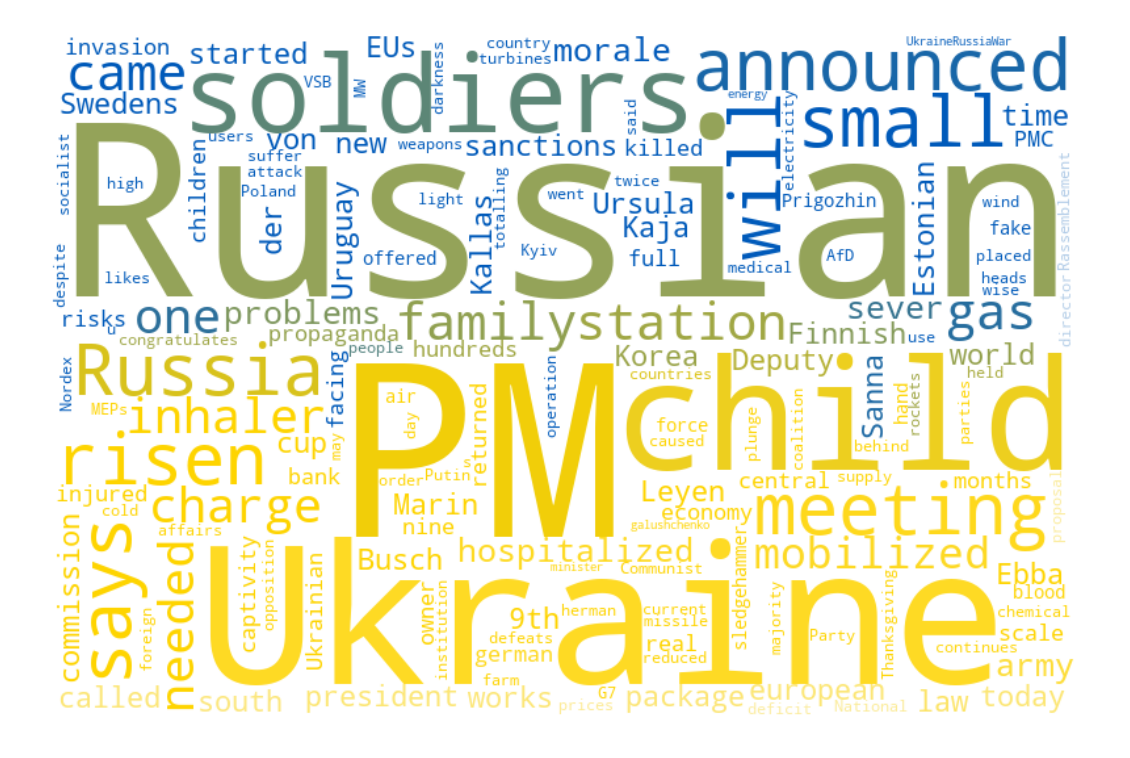

In [32]:
cloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1500, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(cloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("C:/Users/ashis/OneDrive/Desktop/Sem_2/OSINT/stored_tweets/map.png", format="png")

plt.show()